# **Challenge 2**

<img src="https://upload.wikimedia.org/wikipedia/commons/2/23/Without_death.gif" align="right" width="200px">

Realize a parallel implementation of **[Life without Death](https://en.wikipedia.org/wiki/Life_without_Death)** in OpenMP.
<br>
This is a spin on the rules of the well-known [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) automata by John Conway!

<br>

For the uninitiated about classic automata:
<br>
You have a grid of cells of known $width$ and $height$.
<br>
Each cell can be either dead or alive.
<br>
The simulation updates in global time steps.
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/4d/Moore_neighborhood_with_cardinal_directions.svg" align="right" width="200px">
Each cell has a neighborhood (called "Moore neighborhood" for us, see figure on the right) constituted by the eight cells up-down-right-left of itself, plus those diagonally adjacent.
<br>
At every step, a cell:
- if it is dead, be born if it is surrounded by a number $b \in B$ of alive cells, otherwise, remain dead
- if it is alive, stay alive if it is surrounded by a number $s \in S$ of alive cells, otherwise die

The sets $B, S \subseteq \{0, \dots 8\}$ define the rules of the game.
<br>
The classic game of life has rules $B = \{3\}, S = \{2, 3\}$, typically written as B3/S23 in the family of [life-like automata](https://en.wikipedia.org/wiki/Life-like_cellular_automaton).

<br>

Our automata variation:
<br>
Rules are much closer to life without death than to game of life.
<br>
In particular $B = \{3, 6, 8\}, S = \{0, 1, 2, 3, 4, 5, 6, 7, 8\}$, or B368/S012345678. Thus cells can never die.
<br>
The grid "wraps-around" as in it behaves like a toroid. The neighbors of the cells on the edges of the grid are those on the other side w.r.t. their current border. In practice, an arbitrary neighbor with coordinates $(x, y)$ always wraps back to $(x \text{ mod } width, y \text{ mod } height)$.

<br>

Additional rules:
<br>
Each cell is assigned to a color encoded as a float in the range [0, 1] representing "hue" in the [HSV](https://it.wikipedia.org/wiki/Hue_Saturation_Brightness) format.
<br>
Whenever a cell is born, its color is permanently set for the length of its life to the average of all its "parent cells" colors (see the definition of "hue average" in the code).
<br><!--If a cell ever dies (the poor guy had zero neighbors, I feel sorry for him), its color is reset. Not like this could ever happen.
<br>-->
The simulation starts with randomly generated groups of alive cells, each assigned to a random color (see initialization in the code).
<br>
The simulation ends once two consecutive steps results in the same identical grid state, in other words, when a step does not cause any cell to change status.

<br>

Your task is to parallelize in OpenMP, to the best of your abilities, the simulation.
<br>
You are provided, through CLI arguments, with the grid's $width$ and $height$, and a seed that is used to determine a random starting grid configuration.
<br>
You must return the simulation's final, converged, grid state, complete for each cell with its status and color.
<br>
How you perform everything in between is up to you (and OpenMP).

<br>

*Note: you have [here](https://colab.research.google.com/drive/1c1nw8XrW7diQfiQgge58TxzOpSkNerDK?usp=sharing) a python script animating our particular version of the game. Before starting, I suggest you take a look at it, just to grasp on where and when meaningful computation actually occurs.*

*Note: there are notorious ways to speedup the simulation of life-like automata, most notably the [Hashlife](https://en.wikipedia.org/wiki/Hashlife) algorithm and its implementation in [Golly](https://en.wikipedia.org/wiki/Golly_(program)). These are beyond the scope of the course and you are not expected to implement similar techniques. However, their ideas very good readig material if you want to deepen your repertoir of algorithms, and may serve as inspiration for your solution to this challenge. To further discourage any wasted efforths, the specific life-without-death-like set of rules you are hereby tasked with, is not necessary the best target for optimizations like "memoization", as used in the above algorithms. Still, I am reporting here these tools and ideas to pick on your curiosity ^-^ !*

---

A reference sequential implementation is given. Implement your parallel version alongside it in `simulate_parallel`. Rely on the provided sequential version to check the correctness of results.

To get a general performance metric rely on `omp_get_wtime`. The most significant measurement is how much time your code takes to reach the final state of the simulation.

Note that your submissions will be profiled on 16 logical cores (8 physical, with hyperthreading) of an AMD EPYC 7453 @ 2.75GHz with 32GB of RAM.
You are not expected to own a machine with similar specifications, but it is recommended that you test your code, especially its scalability, on your local machine. Doing so will provide you with far more realistic metrics than Colab's two little cores.

To ensure the scalability of your code on the machine it will be tested on, you can assume that the number of threads to use will always be determined through the `OMP_NUM_THREADS` environment variable, which will be set to 16. However, if you want to, you are still entitled to override such behaviour with the `num_threads` clause or other by calling `omp_set_num_threads` after acquiring the available number of CPUs at runtime.

Furthermore, take note that when profiling your code, widely arbitrary (and large) grid sizes and seeds will be used, but none of the initialization logic as you see it now will be altered.

Step one is beating the reference implementation, that should be easy, then you can use all tricks in the book to push it further.
Anything goes, but if you use "exotic" tricks we want an explanation.
In fact, before submitting your work, be sure to fill out the [report](#report) with brief insights of what you did.

Challenge rules and advice:
- groups are of 3 members at most, that should, for as much as possible, equally contribute to the project.
- you automagically get ~3 points in the 2nd part of the exam, taking the form of 1-2 questions that you will be allowed to skip.
- deadline is 1 week (as of this writing, you will need to submit your work before december 2 at 23:59).
- submissions are to be made on WeBeep, where you need to upload a downloaded copy of this notebook (.ipynb file); for groups of multiple people, it's enough for one member to submit the file in the assignment, while every members must write their group's name in their submission, we will then cross-check groups with the content of your report section.
- your code needs to work in an environment equivalent to that available in this notebook through Google Colab.
- do not alter code sections delimited by "==="s in the final submission.
- you can get the maximum grade just by using what was discussed during lectures or is present in the glossary shown during exercise sessions; still, if you wanna have "more fun" here you may find what you seek https://www.openmp.org/resources/openmp-presentations/.
- a piece of code that works is better than a supposedly faster piece of code that doesn't, so don't go overboard, but be ambitious.
- use LLMs (ChatGPT and friends) responsibly; the purpose of this challenge is for you to get your hands dirty and build up confidence in writing parallel code through trial and error. Having an LLM write your code may get you the challenge's points (unless it's so blatant that we notice), but won't lead you to learn anything and the next time you see some parallel code your mind goes blank. If you wack your head at the problem instead, and solve it, the solution will stick in the back of your mind for a long time. Similarly, if despite pushing yourself you can't find "that damn bug", then asking an LLM is fine, so long as you tried first by yourself and just say "ahhhhhh, so that what it was!" upon having the LLM help you out. Long story short, AI is fine so long as it's a tool you **learn from** and **not** one you **blindly lean on**.

If you need help, find a bug, or anything else, please drop us an email:
- Dr. M. Ronzani: marco.ronzani@polimi.it
- Prof. F. Ferrandi: fabrizio.ferrandi@polimi.it

## **Colab Setup**

In [ ]:
%%capture
!apt install build-essential libomp-dev binutils

In [ ]:
!mkdir /home/OpenMP
%cd /home/OpenMP

## **Code**

Prof code (untouched):

In [ ]:
%%writefile life_wout_death.cpp

#include <cstdio>
#include <cstdlib>
#include <cmath>
#include <cstring>
#include <vector>
#include <string>
#include <cstdint>
#include <fstream>
#include <omp.h>

#define MAX_STEPS 1000000
#define NUM_GROUPS 7
#define COLOR_VARIATION 0.08f
#define CLUSTER_FILL_DENSITY 0.55f
#define CLUSTER_RADIUS_FACTOR 0.08f
#define CLUSTER_MIN_RADIUS 3

// === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
// =================================================

// if you need any additional standard library up to C11 or C++17, add it here

// if you need any additional define, add it here

// toggle this to save time when profiling
// be wary: this also disables the results check
#define DISABLE_SEQUENTIAL false

// if you happen to need extra information in the grid, you can modify this object, however,
// only add, do not remove anything, as to preserve compatibility with the sequential version!
//
// notes about the use of C++ here:
// - Grid is a C++ object owning two heap-allocated arrays
// - copying or assigning a Grid (Grid B = A; or B = A;) performs a deep copy of both vectors
// - passing Grid by value also triggers this deep copy, thus always pass by reference
// => this is different from C: the struct looks cheap, but copies are expensive
struct Grid {
  int W, H;
  std::vector<unsigned char> alive; // size: W*H
  std::vector<float> hue; // size: W*H
  // constructor: allocates and owns two dynamic arrays via std::vector
  Grid(int w, int h) : W(w), H(h), alive(w*h,0), hue(w*h,0.0f) {}
};

// =================================================
// === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

// game rules B368 / S012345678:
// - a dead cell is born if alive neighbor count is 3, 6, or 8
// - a live cell survives with ANY count 0..8
inline bool birth_rule(int n) {
  return (n == 3 || n == 6 || n == 8);
}
inline bool survive_rule(int n) {
  return (n >= 0 && n <= 8);
}

// HELPER FUNCTION [YOU CAN USE IT AS-IS]
// hue averaging using circular mean around the unit circle
float hue_average(const float *h, int n) {
  float sumx = 0.0f, sumy = 0.0f;
  for (int i = 0; i < n; i++) {
    float angle = h[i] * 2.0f * M_PI;
    sumx += cosf(angle);
    sumy += sinf(angle);
  }
  float angle = atan2f(sumy, sumx);
  if (angle < 0) angle += 2.0f * M_PI;
  return angle / (2.0f * M_PI);
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// random hue selection
float pick_group_hue(int group_id) {
  float base = float(group_id) / NUM_GROUPS;
  float h = base + ((float)rand() / RAND_MAX)*2*COLOR_VARIATION - COLOR_VARIATION;
  if (h < 0) h += 1.0f;
  if (h >= 1) h -= 1.0f;
  return h;
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// grid initialization with a few clusters
void initialize_grid(Grid &g) {
  int W = g.W, H = g.H;

  int min_dim = (W < H ? W : H);
  int r = int(min_dim * CLUSTER_RADIUS_FACTOR);
  if (r < CLUSTER_MIN_RADIUS) r = CLUSTER_MIN_RADIUS;

  std::vector<float> group_hue(NUM_GROUPS);
  for (int i = 0; i < NUM_GROUPS; i++)
    group_hue[i] = pick_group_hue(i);

  std::vector<int> cx(NUM_GROUPS), cy(NUM_GROUPS);
  for (int i = 0; i < NUM_GROUPS; i++) {
    cx[i] = rand() % W;
    cy[i] = rand() % H;
  }

  for (int g_id = 0; g_id < NUM_GROUPS; g_id++) {
    float base_h = group_hue[g_id];
    int gx = cx[g_id], gy = cy[g_id];

    for (int dx = -r; dx <= r; dx++) {
      for (int dy = -r; dy <= r; dy++) {
        if (dy*dy + dx*dx <= r*r) {
          int x = (gx + dx + 2*W) % W, y = (gy + dy + 2*H) % H;
          if (((float)rand()/RAND_MAX) < CLUSTER_FILL_DENSITY) {
            int idx = y*W + x;
            g.alive[idx] = 1;
            g.hue[idx] = base_h;
          }
        }
      }
    }
  }
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// compares two grids
bool compare_grids(const Grid &a, const Grid &b) {
  int N = a.W * a.H;
  for (int i = 0; i < N; i++) {
    if (a.alive[i] != b.alive[i]) return false;
    if (a.alive[i]) {
      float ha = a.hue[i];
      float hb = b.hue[i];
      // compare hue with a tolerance on floats (due to associativity)
      if (fabs(ha - hb) > 1e-4f) return false;
    }
  }
  return true;
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// write grid to file for later visualization :)
void write_grid_to_file(const Grid &g, const char *filename) {
  FILE *f = fopen(filename, "wb");
  if (!f) {
    fprintf(stderr, "ERROR: cannot open %s for writing\n", filename);
    return;
  }
  uint32_t W = g.W;
  uint32_t H = g.H;
  fwrite(&W, sizeof(uint32_t), 1, f);
  fwrite(&H, sizeof(uint32_t), 1, f);
  for (size_t i = 0; i < W * H; i++)
    fwrite(&g.alive[i], sizeof(uint8_t), 1, f);
  for (size_t i = 0; i < W * H; i++)
    fwrite(&g.hue[i], sizeof(float), 1, f);
  fclose(f);
}

// advance the simulation by one step; return the count of changed cells
int evolve_step(const Grid &cur, Grid &next) {
  int W = cur.W, H = cur.H;
  int changes = 0;

  // iterate over all cells
  for (int x = 0; x < W; x++) {
    for (int y = 0; y < H; y++) {
    int idx = y*W + x;
    unsigned char alive = cur.alive[idx];

    int alive_neighbors = 0;
    float parent_hues[8];

    // count alive moore neighbors and collect their hues
    for (int dx = -1; dx <= 1; dx++) {
      for (int dy = -1; dy <= 1; dy++) {
        if (dx == 0 && dy == 0) continue;
        // wrap around the grid (torus)
        int xx = (x + dx + W) % W;
        int yy = (y + dy + H) % H;
        int nidx = yy*W + xx;
        if (cur.alive[nidx]) {
          parent_hues[alive_neighbors] = cur.hue[nidx];
          alive_neighbors++;
        }
      }
    }

    unsigned char new_alive = alive;

    if (!alive) {
      if (birth_rule(alive_neighbors)) {
        new_alive = 1;
        next.hue[idx] = hue_average(parent_hues, alive_neighbors);
      }
    } else {
      // you are free to skip this check, here it was kept for sake of completeness
      if (survive_rule(alive_neighbors)) {
        new_alive = 1;
        next.hue[idx] = cur.hue[idx];
      } else {
        new_alive = 0;
      }
    }

    next.alive[idx] = new_alive;
    if (new_alive != alive)
      changes++;
    }
  }
  return changes;
}

// sequential simulation entry point
void simulate_sequential(Grid &g) {
  // it's hard to perform updates in place, we ping-pong between grid copies
  Grid tmp(g.W, g.H);

  for (long step = 0; step < MAX_STEPS; step++) {
    // one step at a time
    // note: fully overwrites tmp with the next state
    int changes = evolve_step(g, tmp);

    // swap g <-> tmp
    g.alive.swap(tmp.alive);
    g.hue.swap(tmp.hue);

    if (changes == 0) break;
  }
}

// === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
// =================================================

// ===> IMPLEMENT YOUR VERSION OF THIS FUNCTION <===
// as of now this is a stub: it just calls the sequential version...
void simulate_parallel(Grid &g) {
  simulate_sequential(g);
}

// =================================================
// === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

int main(int argc, char **argv) {
    omp_set_nested(true); // just in case, enable nested parallelism

    if (argc < 4 || argc > 5) {
        fprintf(stderr, "Usage: %s <grid-width> <grid-height> <seed> <[opt]-output-filename>\n", argv[0]);
        return 1;
    }

    int W = atoi(argv[1]);
    int H = atoi(argv[2]);
    int seed = atoi(argv[3]);
    srand(seed);

    Grid gs(W,H), gp(W,H);
    initialize_grid(gs);
    // copy the initial state
    gp = gs;

    // === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
    // =================================================

    // if you need to initialize additional things, do that here!

    // =================================================
    // === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

    // sequential
    #if !DISABLE_SEQUENTIAL
    double t1 = omp_get_wtime();
    simulate_sequential(gs);
    double t2 = omp_get_wtime();
    #endif

    // parallel
    double t3 = omp_get_wtime();
    simulate_parallel(gp);
    double t4 = omp_get_wtime();

    #if !DISABLE_SEQUENTIAL
    printf("Sequent. time: %.6f s\n", t2 - t1);
    #endif
    printf("Parallel time: %.6f s\n", t4 - t3);

    #if !DISABLE_SEQUENTIAL
    bool equal = compare_grids(gs, gp);
    printf("Results check: %s\n", equal ? "PASS" : "FAIL");
    #endif

    // === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
    // =================================================

    // if you need more logging, put it here!

    // =================================================
    // === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

    if (argc == 5) {
      write_grid_to_file(gp, (char *)argv[4]);
      printf("Results written to %s\n", (char *)argv[4]);
    }

    return 0;
}

our code (last commit before deadline), can use Cmake to compile:

In [ ]:
%%writefile our_life_wout_death.cpp
#include <cstdio>
#include <cstdlib>
#include <cmath>
#include <cstring>
#include <vector>
#include <string>
#include <cstdint>
#include <fstream>
#include <omp.h>

#define MAX_STEPS 1000000
#define NUM_GROUPS 7
#define COLOR_VARIATION 0.08f
#define CLUSTER_FILL_DENSITY 0.55f
#define CLUSTER_RADIUS_FACTOR 0.08f
#define CLUSTER_MIN_RADIUS 3

// === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
// =================================================

// if you need any additional standard library up to C11 or C++17, add it here

// if you need any additional define, add it here

// toggle this to save time when profiling
// be wary: this also disables the results check
#define DISABLE_SEQUENTIAL false

#define INDEX(x,y) (y*W + x)
#define WRAP(x,y) INDEX((x+W)%W,(y+H)%H)
#define INLINE_KER_SUM(vec) vec[WRAP(x-1,y-1)]+vec[WRAP(x,y-1)]+vec[WRAP(x+1,y-1)]+\
                            vec[WRAP(x-1,y)]+                   vec[WRAP(x+1,y)]+\
                            vec[WRAP(x-1,y+1)]+vec[WRAP(x,y+1)]+vec[WRAP(x+1,y+1)]

// if you happen to need extra information in the grid, you can modify this object, however,
// only add, do not remove anything, as to preserve compatibility with the sequential version!
//
// notes about the use of C++ here:
// - Grid is a C++ object owning two heap-allocated arrays
// - copying or assigning a Grid (Grid B = A; or B = A;) performs a deep copy of both vectors
// - passing Grid by value also triggers this deep copy, thus always pass by reference
// => this is different from C: the struct looks cheap, but copies are expensive
struct Grid {
    int W, H;
    std::vector<unsigned char> alive; // size: W*H
    std::vector<float> hue; // size: W*H
    std::vector<unsigned char> updated_alive;
    std::vector<float> updated_hue;
    // constructor: allocates and owns two dynamic arrays via std::vector
    Grid(int w, int h) : W(w), H(h),
                alive(w * h, 0), hue(w * h, 0.0f),
                updated_alive(w * h,0), updated_hue(w * h,0.0f)
    {}

    bool step_v1() {
        bool changed = false;
        #pragma omp parallel for collapse(2) schedule(guided) reduction(||:changed)
        for (int y = 0; y < H; y++) {
            for (int x = 0; x < W; x++) {
                const int index = INDEX(x, y);
                updated_alive[index] = alive[index];
                updated_hue[index] = hue[index];
                if (!alive[index]) {
                    const int neighbours = INLINE_KER_SUM(alive);
                    if (neighbours == 3 || neighbours == 6 || neighbours == 8) {
                        updated_alive[index] = 1;
                        updated_hue[index] = new_hue(x,y);
                        changed = true;
                     }
                }
            }
        }

        std::swap(alive,updated_alive);
        std::swap(hue ,updated_hue);

        return changed;
    }

    int evolve() {
        int k = 0;
        bool changed = true;
        while (k++ < MAX_STEPS && changed) {
            changed = step_v1();
        }
        return k;
    }

    [[nodiscard]] float new_hue(int x, int y) const {
        float cos_val = 0.0f,sin_val = 0.0f;
        if (alive[WRAP(x-1,y-1)]) {
            cos_val += cosf(hue[WRAP(x-1,y-1)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x-1,y-1)] * 2.0f *M_PI);
        }
        if (alive[WRAP(x,y-1)]) {
            cos_val += cosf(hue[WRAP(x,y-1)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x,y-1)] * 2.0f *M_PI);
        }
        if (alive[WRAP(x+1,y-1)]) {
            cos_val += cosf(hue[WRAP(x+1,y-1)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x+1,y-1)] * 2.0f *M_PI);
        }
        if (alive[WRAP(x-1,y)]) {
            cos_val += cosf(hue[WRAP(x-1,y)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x-1,y)] * 2.0f *M_PI);
        }
        if (alive[WRAP(x+1,y)]) {
            cos_val += cosf(hue[WRAP(x+1,y)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x+1,y)] * 2.0f *M_PI);
        }
        if (alive[WRAP(x-1,y+1)]) {
            cos_val += cosf(hue[WRAP(x-1,y+1)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x-1,y+1)] * 2.0f *M_PI);
        }
        if (alive[WRAP(x,y+1)]) {
            cos_val += cosf(hue[WRAP(x,y+1)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x,y+1)] * 2.0f *M_PI);
        }
        if (alive[WRAP(x+1,y+1)]) {
            cos_val += cosf(hue[WRAP(x+1,y+1)] * 2.0f *M_PI);
            sin_val += sinf(hue[WRAP(x+1,y+1)] * 2.0f *M_PI);
        }

        float angle = atan2f(sin_val, cos_val);
        return (angle<0) ? (angle+2.0f*M_PI)/(2.0f*M_PI) : angle/(2.0f*M_PI);
    }
};

// =================================================
// === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

// game rules B368 / S012345678:
// - a dead cell is born if alive neighbor count is 3, 6, or 8
// - a live cell survives with ANY count 0..8
inline bool birth_rule(int n) {
  return (n == 3 || n == 6 || n == 8);
}
inline bool survive_rule(int n) {
  return (n >= 0 && n <= 8);
}

// HELPER FUNCTION [YOU CAN USE IT AS-IS]
// hue averaging using circular mean around the unit circle
float hue_average(const float *h, int n) {
  float sumx = 0.0f, sumy = 0.0f;
  for (int i = 0; i < n; i++) {
    float angle = h[i] * 2.0f * M_PI;
    sumx += cosf(angle);
    sumy += sinf(angle);
  }
  float angle = atan2f(sumy, sumx);
  if (angle < 0) angle += 2.0f * M_PI;
  return angle / (2.0f * M_PI);
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// random hue selection
float pick_group_hue(int group_id) {
  float base = float(group_id) / NUM_GROUPS;
  float h = base + ((float)rand() / RAND_MAX)*2*COLOR_VARIATION - COLOR_VARIATION;
  if (h < 0) h += 1.0f;
  if (h >= 1) h -= 1.0f;
  return h;
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// grid initialization with a few clusters
void initialize_grid(Grid &g) {
  int W = g.W, H = g.H;

  int min_dim = (W < H ? W : H);
  int r = int(min_dim * CLUSTER_RADIUS_FACTOR);
  if (r < CLUSTER_MIN_RADIUS) r = CLUSTER_MIN_RADIUS;

  std::vector<float> group_hue(NUM_GROUPS);
  for (int i = 0; i < NUM_GROUPS; i++)
    group_hue[i] = pick_group_hue(i);

  std::vector<int> cx(NUM_GROUPS), cy(NUM_GROUPS);
  for (int i = 0; i < NUM_GROUPS; i++) {
    cx[i] = rand() % W;
    cy[i] = rand() % H;
  }

  for (int g_id = 0; g_id < NUM_GROUPS; g_id++) {
    float base_h = group_hue[g_id];
    int gx = cx[g_id], gy = cy[g_id];

    for (int dx = -r; dx <= r; dx++) {
      for (int dy = -r; dy <= r; dy++) {
        if (dy*dy + dx*dx <= r*r) {
          int x = (gx + dx + 2*W) % W, y = (gy + dy + 2*H) % H;
          if (((float)rand()/RAND_MAX) < CLUSTER_FILL_DENSITY) {
            int idx = y*W + x;
            g.alive[idx] = 1;
            g.hue[idx] = base_h;
          }
        }
      }
    }
  }
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// compares two grids
bool compare_grids(const Grid &a, const Grid &b) {
  int N = a.W * a.H;
  for (int i = 0; i < N; i++) {
    if (a.alive[i] != b.alive[i]) return false;
    if (a.alive[i]) {
      float ha = a.hue[i];
      float hb = b.hue[i];
      // compare hue with a tolerance on floats (due to associativity)
      if (fabs(ha - hb) > 1e-4f) return false;
    }
  }
  return true;
}

// HELPER FUNCTION [YOU DON'T NEED TO USE THIS]
// write grid to file for later visualization :)
void write_grid_to_file(const Grid &g, const char *filename) {
  FILE *f = fopen(filename, "wb");
  if (!f) {
    fprintf(stderr, "ERROR: cannot open %s for writing\n", filename);
    return;
  }
  uint32_t W = g.W;
  uint32_t H = g.H;
  fwrite(&W, sizeof(uint32_t), 1, f);
  fwrite(&H, sizeof(uint32_t), 1, f);
  for (size_t i = 0; i < W * H; i++)
    fwrite(&g.alive[i], sizeof(uint8_t), 1, f);
  for (size_t i = 0; i < W * H; i++)
    fwrite(&g.hue[i], sizeof(float), 1, f);
  fclose(f);
}

// advance the simulation by one step; return the count of changed cells
int evolve_step(const Grid &cur, Grid &next) {
  int W = cur.W, H = cur.H;
  int changes = 0;

  // iterate over all cells
  for (int x = 0; x < W; x++) {
    for (int y = 0; y < H; y++) {
    int idx = y*W + x;
    unsigned char alive = cur.alive[idx];

    int alive_neighbors = 0;
    float parent_hues[8];

    // count alive moore neighbors and collect their hues
    for (int dx = -1; dx <= 1; dx++) {
      for (int dy = -1; dy <= 1; dy++) {
        if (dx == 0 && dy == 0) continue;
        // wrap around the grid (torus)
        int xx = (x + dx + W) % W;
        int yy = (y + dy + H) % H;
        int nidx = yy*W + xx;
        if (cur.alive[nidx]) {
          parent_hues[alive_neighbors] = cur.hue[nidx];
          alive_neighbors++;
        }
      }
    }

    unsigned char new_alive = alive;

    if (!alive) {
      if (birth_rule(alive_neighbors)) {
        new_alive = 1;
        next.hue[idx] = hue_average(parent_hues, alive_neighbors);
      }
    } else {
      // you are free to skip this check, here it was kept for sake of completeness
      if (survive_rule(alive_neighbors)) {
        new_alive = 1;
        next.hue[idx] = cur.hue[idx];
      } else {
        new_alive = 0;
      }
    }

    next.alive[idx] = new_alive;
    if (new_alive != alive)
      changes++;
    }
  }
  return changes;
}

// sequential simulation entry point
void simulate_sequential(Grid &g) {
  // it's hard to perform updates in place, we ping-pong between grid copies
  Grid tmp(g.W, g.H);

  for (long step = 0; step < MAX_STEPS; step++) {
    // one step at a time
    // note: fully overwrites tmp with the next state
    int changes = evolve_step(g, tmp);

    // swap g <-> tmp
    g.alive.swap(tmp.alive);
    g.hue.swap(tmp.hue);

    if (changes == 0) break;
  }
}

// === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
// =================================================

// ===> IMPLEMENT YOUR VERSION OF THIS FUNCTION <===
// as of now this is a stub: it just calls the sequential version...
int simulate_parallel(Grid &g) {
    return g.evolve();
}

// =================================================
// === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

int main(int argc, char **argv) {
    omp_set_nested(true); // just in case, enable nested parallelism

    if (argc < 4 || argc > 5) {
        fprintf(stderr, "Usage: %s <grid-width> <grid-height> <seed> <[opt]-output-filename>\n", argv[0]);
        return 1;
    }

    int W = atoi(argv[1]);
    int H = atoi(argv[2]);
    int seed = atoi(argv[3]);
    srand(seed);

    Grid gs(W,H), gp(W,H);
    initialize_grid(gs);
    // copy the initial state
    gp = gs;

    // === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
    // =================================================

  // if you need to initialize additional things, do that here!
    gp.updated_alive = gp.alive;
    gp.updated_hue = gp.hue;

    // =================================================
    // === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

    // sequential
    #if !DISABLE_SEQUENTIAL
    double t1 = omp_get_wtime();
    simulate_sequential(gs);
    double t2 = omp_get_wtime();
    #endif

    // parallel
    double t3 = omp_get_wtime();
    simulate_parallel(gp);
    double t4 = omp_get_wtime();

    #if !DISABLE_SEQUENTIAL
    printf("Sequent. time: %.6f s\n", t2 - t1);
    #endif
    printf("Parallel time: %.6f s\n", t4 - t3);

    #if !DISABLE_SEQUENTIAL
    bool equal = compare_grids(gs, gp);
    printf("Results check: %s\n", equal ? "PASS" : "FAIL");
    #endif

    // === DO NOT CHANGE ANYTHING ABOVE THIS COMMENT ===
    // =================================================

    // if you need more logging, put it here!

    // =================================================
    // === DO NOT CHANGE ANYTHING BELOW THIS COMMENT ===

    if (argc == 5) {
        write_grid_to_file(gp, (char *)argv[4]);
        printf("Results written to %s\n", (char *)argv[4]);
    }

    return 0;
}

In [ ]:
!git clone https://github.com/PurpleVale/polimi-parallel-comp-life-without-death
!cd polimi-parallel-comp-life-without-death
!g++ src/our_implementation.cpp -O2 -pg -fopenmp -o bin/LwD
!./bin/LwD 120 180 86 final_grid.temp
!gprof -p ./bin/LwD gmon.out > profile.txt

## **Compile, Run, Profile**

Compile and run:

In [ ]:
!g++ life_wout_death.cpp -O1 -fopenmp -o life_wout_death

In [ ]:
!./life_wout_death 120 180 86 final_grid.temp

Profile:

In [ ]:
# you can change "-O1" for "-O0", but that may result in too much information
!g++ life_wout_death.cpp -O1 -pg -fopenmp -o life_wout_death_prof
!./life_wout_death_prof 120 180 86

In [ ]:
# you can remove the "-p" to also see the call graph, but that gets bulky...
!gprof -p life_wout_death_prof gmon.out > profile.txt
!cat profile.txt

Visualize:

In [ ]:
import sys
import struct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_grid_binary(filename):
  with open(filename, "rb") as f:
    W = struct.unpack("<i", f.read(4))[0]
    H = struct.unpack("<i", f.read(4))[0]
    N = W * H
    alive = np.frombuffer(f.read(N * 1), dtype=np.uint8)
    hue = np.frombuffer(f.read(N * 4), dtype=np.float32)
  return W, H, alive.reshape(H, W), hue.reshape(H, W)

def hue_to_rgb(hue):
  hsv = np.zeros(hue.shape + (3,), dtype = float)
  hsv[..., 0] = hue
  hsv[..., 1] = 1.0 # full saturation
  hsv[..., 2] = 1.0 # full value
  return mcolors.hsv_to_rgb(hsv)

def render(filename):
  W, H, alive, hue = load_grid_binary(filename)
  rgb = hue_to_rgb(hue)
  rgb[alive == 0] = 0.0

  plt.figure(figsize=(10,10))
  plt.imshow(rgb, interpolation = "nearest")
  plt.title(f"{filename} ({W} × {H})")
  plt.axis("off")
  plt.show()

In [ ]:
# put in here the same filename you passed as a CLI argument before
render("final_grid.temp")

<a name="report"></a>
## **Brief Report**

<font color='cyan'>**You must fill in this section!!**</font>

Group information:
- member-1: Vale, Turco, 10809855
- member-2: Alessia, Rigoni, 10859832
- member-3: Giulio Enzo, Donninelli, 10823453
- your group's HatsuOpenMP Miku and LOGO<br>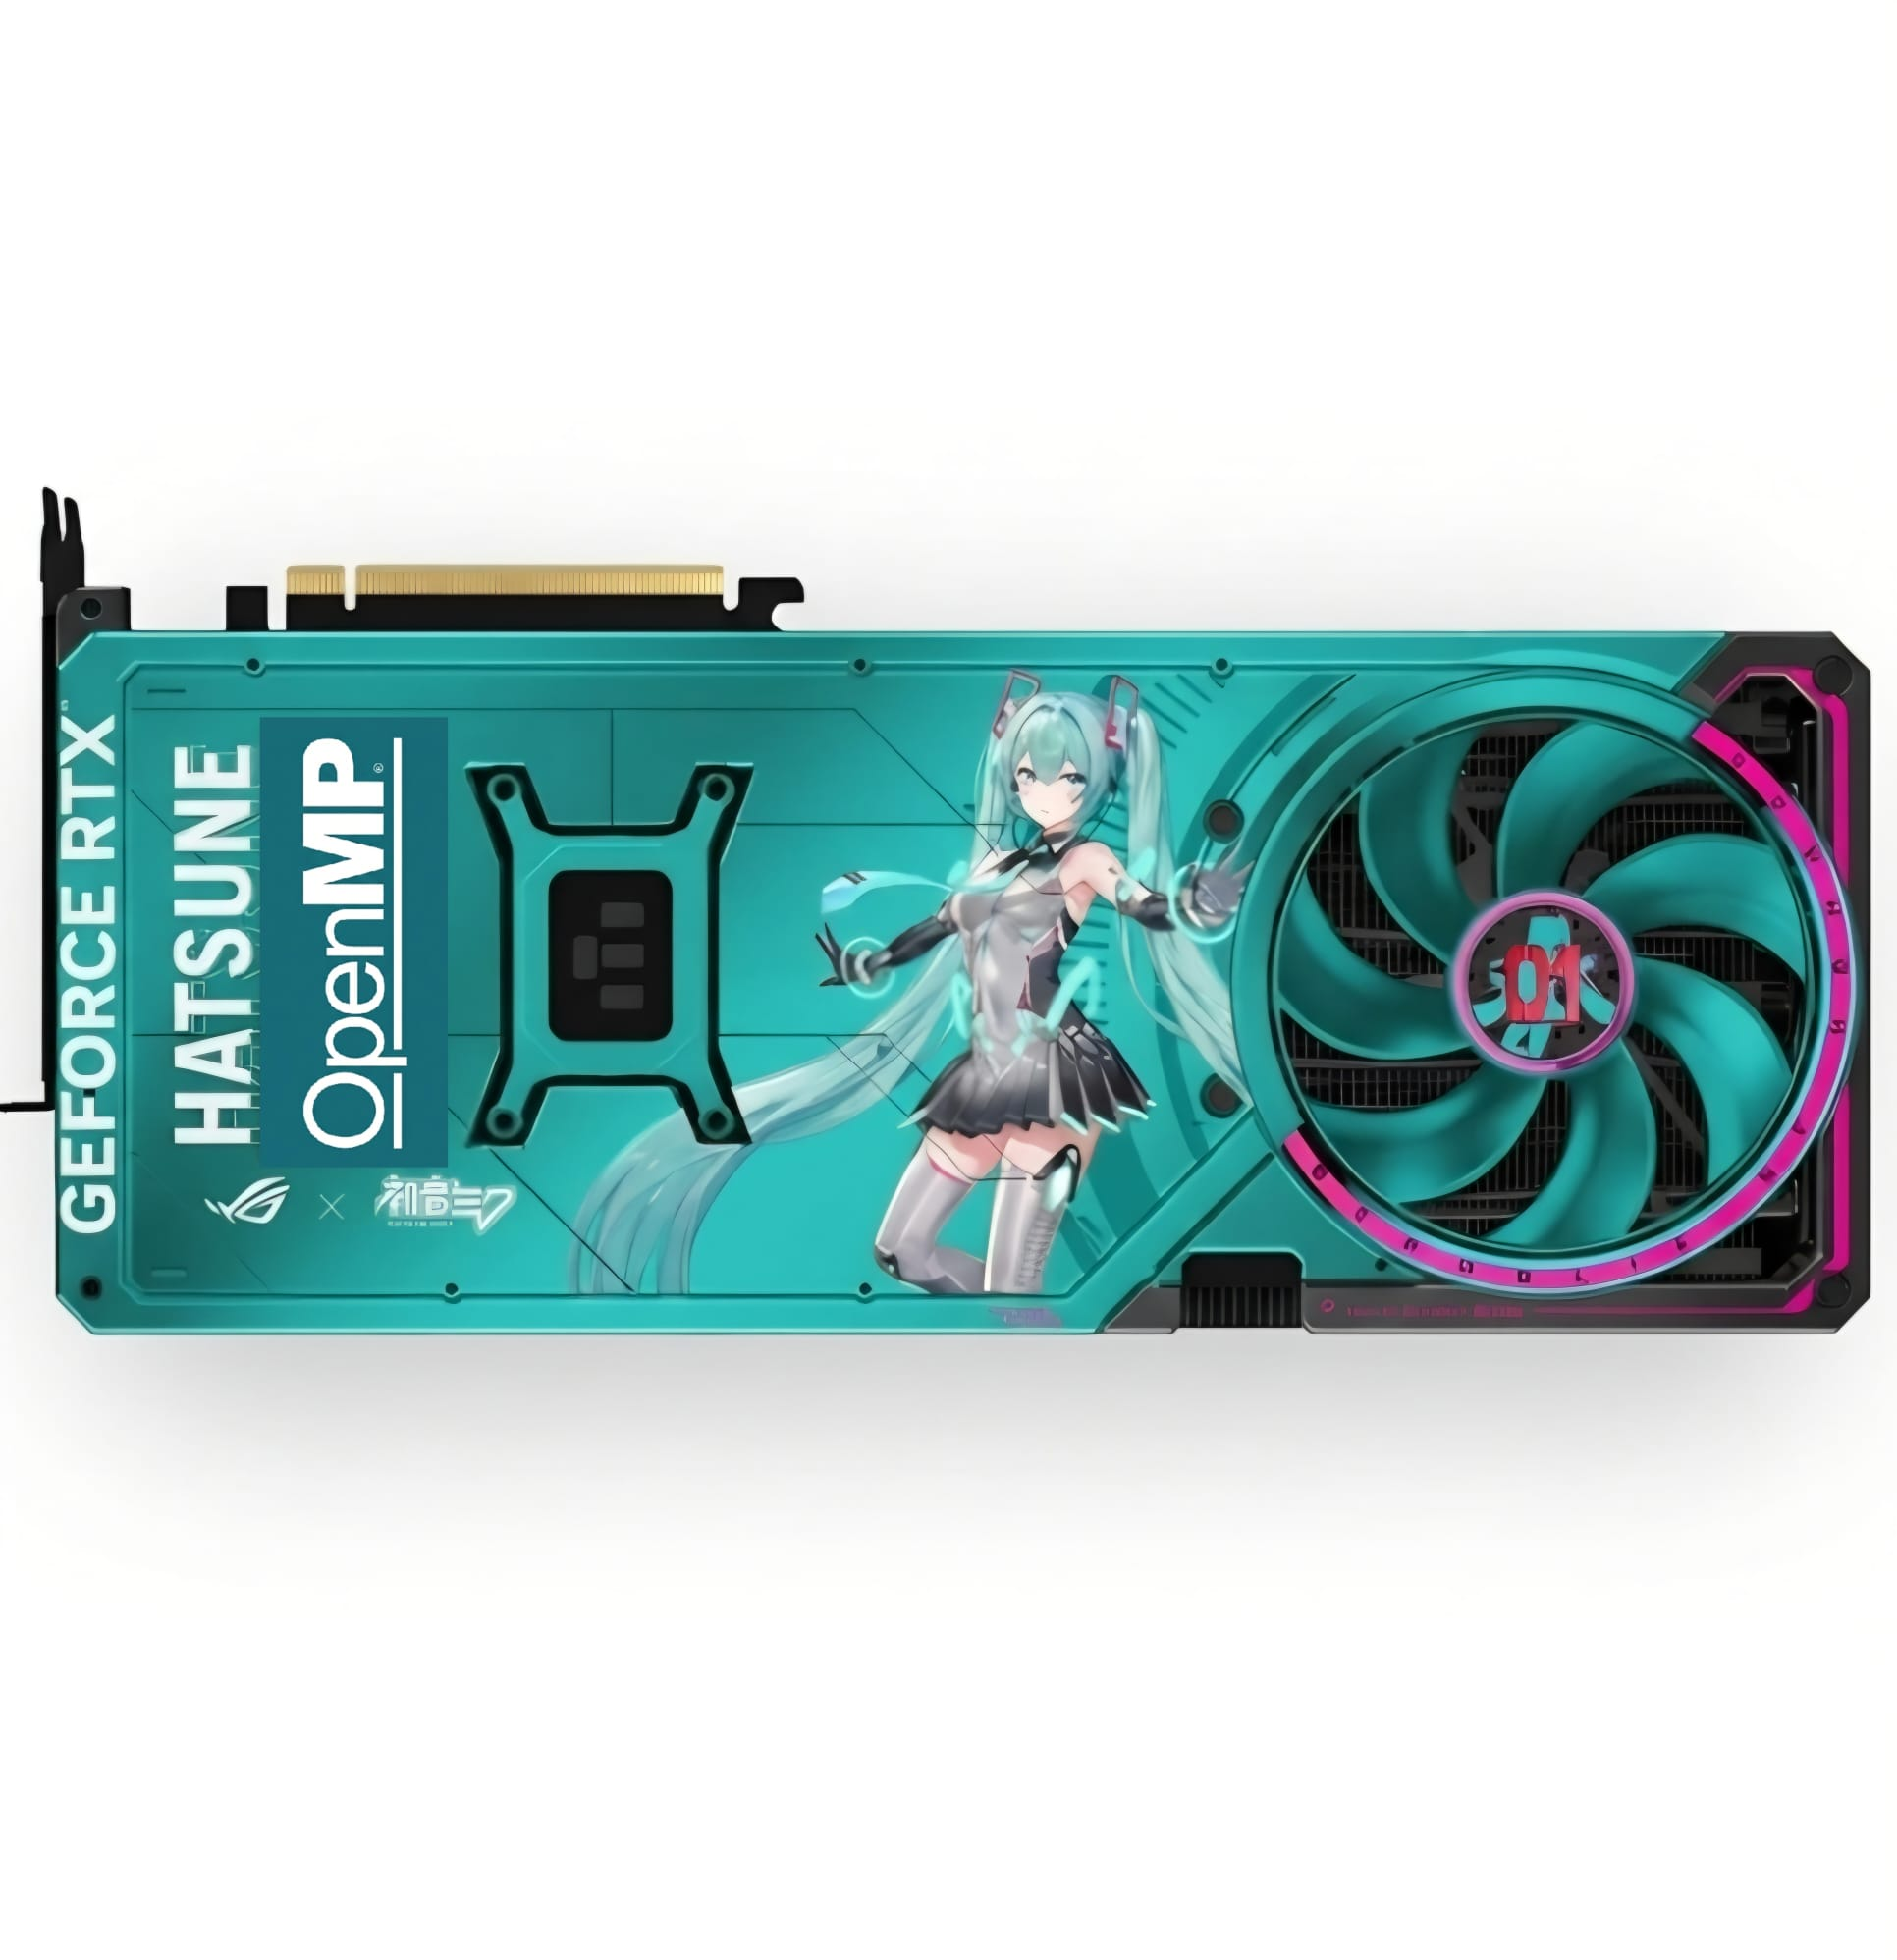

*Note: you can keep your name and logo from Challenge 1, or choose new ones, that's just up to your liking! As for me, how could I ever miss such an blatant opportunity to drop an anime reference ^-^ !*
<!-- once more, if you reeeeeally don't have ideas for a logo, before giving up, check this out: https://picrew.me/en/image_maker/47882 -->

<font color='tomato'>*Note: to ease my automated parsing, please do not change the content of this text box aside from suitably replacing the words in CAPS and the figure's HTML tag. Place any "additional content" in the next box.*</font>
<!-- accounting for all the edge cases you created costed me way too many hours of sleep last time, so one shall learn from its own mistakes -->

Bullet points describing what you did with a short motivation:
- we have tried 2 solution (see our_implementation_v2.cpp in github)
  - the solution we are going for is the simplest one and consist of only one openmp parallel for
  - the other uses a different algorithm, keeping track of how the border moves at each iteration. and only does computation on the border
    - this solution has performance comparable with the simple for, so we are going with the simplest one
    - probably would work best if omp had support for stl iterator (we could use set/map to ensure uniqness of border cells). but it would seem only some compiler support stl iterators.
    - the bottle neck is the overhead in keeping the border with unique cells, a parallel sorting algorithm and an algoritmh removing duplicates could be develop, but there is too little time for this challenge.
- here we discuss the simple implementation:
  - Only used the pragan omp parallel for, seemed to be sufficient.
  - collapse(2) seems to work best.
  - only considering cells that are yet to be born for updates.
  - no need to use for to check the Moore neighborhood, just use 8 sums.
  - hue could be approximated, by computing cosine, sine and arctan2 at lower precision then the one obtained by standars c++ library (we didn't in this instance).
  - switched the order of the fors in the step function, hopefully behaves nicer with caches.
  - profiling done at [google sheet](https://docs.google.com/spreadsheets/d/1q1YAxiXo2tiVPbItVfo0__0ttwRlqZgJAdyFnSGF6EM/edit?usp=sharing)